# 1. Imports

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

# 2. Load the Data

In [3]:
import requests

url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip'
response = requests.get(url)

with open('./data/horse-or-human.zip', 'wb') as file:
    file.write(response.content)

In [4]:
url = 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip'
response = requests.get(url)

with open('./data/validation-horse-or-human.zip', 'wb') as file:
    file.write(response.content)

In [5]:
import zipfile

zip_ref = zipfile.ZipFile("./data/horse-or-human.zip", "r")
zip_ref.extractall("./data/horse-or-human")

zip_ref = zipfile.ZipFile("./data/validation-horse-or-human.zip", "r")
zip_ref.extractall("./data/validation-horse-or-human")

zip_ref.close()

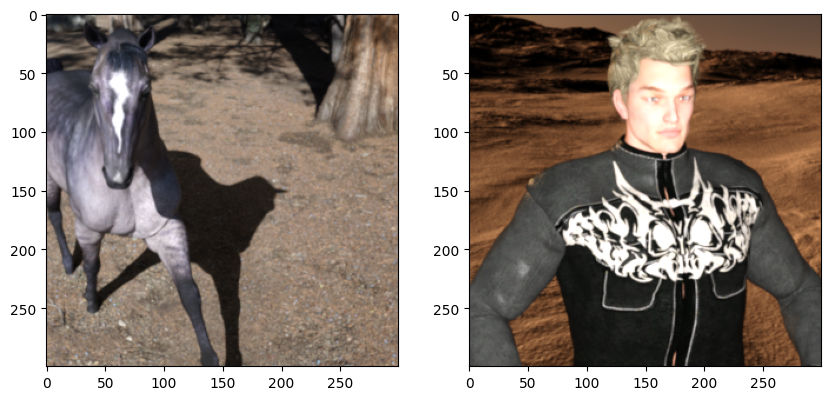

In [6]:
from tensorflow.keras.preprocessing.image import load_img

# Let's look at some images
base_dir = "./data/horse-or-human"
horses_dir = os.path.join(base_dir, "horses/")
humans_dir = os.path.join(base_dir, "humans/")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(load_img(f"{os.path.join(horses_dir, os.listdir(horses_dir)[0])}"))
axes[1].imshow(load_img(f"{os.path.join(humans_dir, os.listdir(humans_dir)[0])}"))

# 3. Pre-processing the Data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir_val = "./data/validation-horse-or-human"

def image_generator():
    train_datagen = ImageDataGenerator(rescale=1./255.)
    validation_datagen = ImageDataGenerator(rescale=1./255.)

    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150,150),
                                                        batch_size=128,
                                                        class_mode='binary')
    
    validation_generator = validation_datagen.flow_from_directory(directory=base_dir_val,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')
    
    return train_generator, validation_generator

train_gen, val_gen = image_generator()

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# 4. Defining the Callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.995:
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

# 5. Creating and Training a Model

In [13]:
def train_horses_and_humans_model(train_generator, validation_generator):
    callbacks = myCallback()

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2), 
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),   
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001),
                  metrics=['accuracy'])
    
    history = model.fit(x=train_generator, 
                        steps_per_epoch=8,
                        epochs=15,
                        verbose=1,
                        validation_data = validation_generator,
                        validation_steps=8,
                        callbacks=[callbacks])
    
    return history

In [14]:
history = train_horses_and_humans_model(train_gen, val_gen)

Epoch 1/15
8/8 [==============================] - 6s 720ms/step - loss: 0.7287 - accuracy: 0.6035 - val_loss: 0.5655 - val_accuracy: 0.8633
Epoch 2/15
8/8 [==============================] - 5s 598ms/step - loss: 0.5254 - accuracy: 0.7419 - val_loss: 1.0020 - val_accuracy: 0.5156
Epoch 3/15
8/8 [==============================] - 6s 699ms/step - loss: 0.4303 - accuracy: 0.8086 - val_loss: 0.4628 - val_accuracy: 0.7930
Epoch 4/15
8/8 [==============================] - 5s 595ms/step - loss: 0.3223 - accuracy: 0.8966 - val_loss: 0.5550 - val_accuracy: 0.7656
Epoch 5/15
8/8 [==============================] - 5s 604ms/step - loss: 0.3811 - accuracy: 0.8754 - val_loss: 0.7004 - val_accuracy: 0.7422
Epoch 6/15
8/8 [==============================] - 5s 611ms/step - loss: 0.2511 - accuracy: 0.9132 - val_loss: 0.7019 - val_accuracy: 0.7500
Epoch 7/15
8/8 [==============================] - 5s 592ms/step - loss: 0.1992 - accuracy: 0.9399 - val_loss: 0.4060 - val_accuracy: 0.8594
Epoch 8/15
8/8 [====